In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yerra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yerra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data=pd.read_csv("covid19_tweets.csv")
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', ' ', text) # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]',' ', text) # Remove special characters
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [5]:
data['clean_text'] = data['text'].apply(preprocess_text)

Logistic Regression Accuracy: 0.8806040980403105


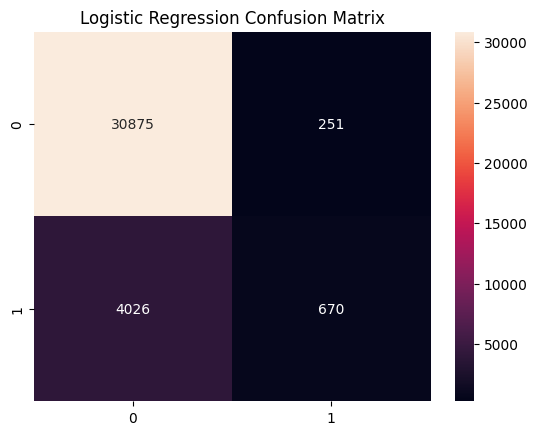

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['user_verified'], test_size=0.2,random_state=42)

# Logistic Regression Model
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

# Logistic Regression Evaluation
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {lr_acc}')
sns.heatmap(lr_cm, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

C:\Users\yerra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 342s 75ms/step - accuracy: 0.8734 - loss: 0.3514 - val_accuracy: 0.8767 - val_loss: 0.3215
Epoch 2/5
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 527s 118ms/step - accuracy: 0.8822 - loss: 0.2994 - val_accuracy: 0.8775 - val_loss: 0.3192
Epoch 3/5
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 625s 140ms/step - accuracy: 0.8869 - loss: 0.2791 - val_accuracy: 0.8769 - val_loss: 0.3304
Epoch 4/5
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 623s 139ms/step - accuracy: 0.8935 - loss: 0.2597 - val_accuracy: 0.8737 - val_loss: 0.3318
Epoch 5/5
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 621s 139ms/step - accuracy: 0.9018 - loss: 0.2399 - val_accuracy: 0.8743 - val_loss: 0.3426
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step
LSTM Accuracy: 0.8742951259002847


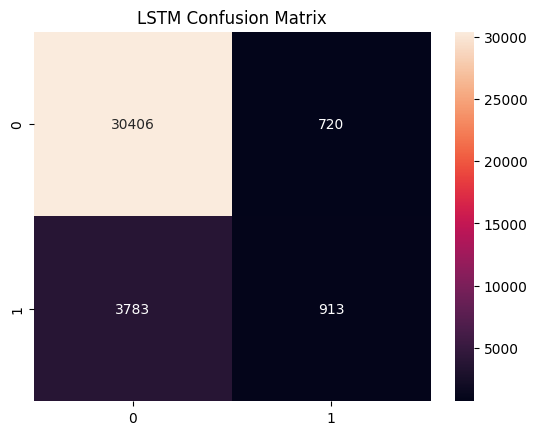

In [19]:
# LSTM Model Preparation
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

# Define LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))

# LSTM Evaluation
y_pred_lstm = (lstm_model.predict(X_test_seq)> 0.5).astype("int32")
lstm_acc = accuracy_score(y_test, y_pred_lstm)
lstm_cm = confusion_matrix(y_test, y_pred_lstm)
print(f'LSTM Accuracy: {lstm_acc}')
sns.heatmap(lstm_cm, annot=True, fmt='d')
plt.title('LSTM Confusion Matrix')
plt.show()

In [17]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'clean_text'],
      dtype='object')